# Computational Physics U24568
## Lecture 6a - Reading and Cleaning Data with Pandas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Today we'll be using a 2022 dataset from the Department for Environment, Food & Rural Affairs, downloaded from [this link](https://environment.data.gov.uk/water-quality/view/download/new).
This dataset is available under the [Open Government Licence v3.0](https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/).

The dataset lists all the water quality samples that DEFRA took in the Solent region in 2022, with information about the location, the type of water sampled, and what chemical measurements were made.

In [73]:
# Load the data
# Creates a DataFrame
data = pd.read_csv('SSD-2022.csv')

CSVs are comma-separated variable files, meaning the data is just written one row a line with a comma between each column. It's a very common data format because it's so simple, but it's not very efficient. Often you'll find data instead in an Excel spreadsheet, and you can use Pandas `read_excel` to read those.

The [Pandas User Guide](https://pandas.pydata.org/docs/user_guide/index.html) has information about all the functionality of Pandas, plus some getting started guides. In this notebook, we'll have just a short overview of some things that it can do.

To get a quick look at the data, we can use `data.head()` to see the first few rows.

In [96]:
data.head()

,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.sampledMaterialType.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
0,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-5GWQ0376,"THE CHANTRY, STORRINGTON",2022-01-12T11:02:00,PFHxSA,Perfluorohexanesulfonamide,2965,<,0.0005,NaN,ug/l,GROUNDWATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,509219,112805
1,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-5GWQ0376,"THE CHANTRY, STORRINGTON",2022-01-12T11:02:00,11Cl-PF3OUdS,11-chloroeicosafluoro-3-oxaundecane-1-sulfonic...,2993,<,0.0010,NaN,ug/l,GROUNDWATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,509219,112805
2,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-5GWQ0376,"THE CHANTRY, STORRINGTON",2022-01-12T11:02:00,6:2 FTSA,6:2 Fluorotelomer sulfonic acid,2984,NaN,0.0089,NaN,ug/l,GROUNDWATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,509219,112805
3,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-5GWQ0376,"THE CHANTRY, STORRINGTON",2022-01-12T11:02:00,PFpentncAcid,Perfluoropentanoic acid,8887,<,0.0010,NaN,ug/l,GROUNDWATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,509219,112805
4,http://environment.data.gov.uk/water-quality/d...,http://environment.data.gov.uk/water-quality/i...,SO-5GWQ0376,"THE CHANTRY, STORRINGTON",2022-01-12T11:02:00,N-MeFOSA,N-methylperfluorooctanesulfonamide,2975,<,0.0020,NaN,ug/l,GROUNDWATER,False,ENVIRONMENTAL MONITORING STATUTORY (EU DIRECTI...,509219,112805


Then `data.info()` will give us a summary of what type of data is in each column, and how many of these are valid values rather than missing data.

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121303 entries, 0 to 121302
Data columns (total 17 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   @id                                       121303 non-null  object 
 1   sample.samplingPoint                      121303 non-null  object 
 2   sample.samplingPoint.notation             121303 non-null  object 
 3   sample.samplingPoint.label                121303 non-null  object 
 4   sample.sampleDateTime                     121303 non-null  object 
 5   determinand.label                         121303 non-null  object 
 6   determinand.definition                    121303 non-null  object 
 7   determinand.notation                      121303 non-null  int64  
 8   resultQualifier.notation                  25009 non-null   object 
 9   result                                    121303 non-null  float64
 10  codedResultInterpret

To select a specific column like `@id`, do `data['@id']`, and you'll get a Pandas Series. You can treat that like a Numpy array. You can do a comparison or other function to get an array of Booleans (i.e. True, False), and then use it to slice the DataFrame (select just the rows where the result is True).

**Exercise**: Select the `sample.sampledMaterialType.label` column, and make an array of Booleans called `gndwtr` that indicate whether the label is `'GROUNDWATER'`. Use `np.sum` to count how many `True` values there are.

In [98]:
gndwtr = data['sample.sampledMaterialType.label'] == 'GROUNDWATER'

In [100]:
np.sum(gndwtr)

10342

In [101]:
# To get a new DataFrame with just these rows
df_gndwtr = data[gndwtr]

There is a function `.duplicated()` that returns True if the entry is a duplicate of one above. You can follow it with `.any()` if you want to check whether the column has any duplicates. You can also use `.drop_duplicates()` if you just want to keep the first of each uinque value.

**Exercise**: The below code iterates through the names of columns in the dataset. Modify it to find which columns have duplicated values.

In [102]:
for col in data.keys():
    print(col)

@id
sample.samplingPoint
sample.samplingPoint.notation
sample.samplingPoint.label
sample.sampleDateTime
determinand.label
determinand.definition
determinand.notation
resultQualifier.notation
result
codedResultInterpretation.interpretation
determinand.unit.label
sample.sampledMaterialType.label
sample.isComplianceSample
sample.purpose.label
sample.samplingPoint.easting
sample.samplingPoint.northing


In [104]:
for col in data.keys():
    if data[col].duplicated().any():
        print(col, 'has duplicates')

sample.samplingPoint has duplicates
sample.samplingPoint.notation has duplicates
sample.samplingPoint.label has duplicates
sample.sampleDateTime has duplicates
determinand.label has duplicates
determinand.definition has duplicates
determinand.notation has duplicates
resultQualifier.notation has duplicates
result has duplicates
codedResultInterpretation.interpretation has duplicates
determinand.unit.label has duplicates
sample.sampledMaterialType.label has duplicates
sample.isComplianceSample has duplicates
sample.purpose.label has duplicates
sample.samplingPoint.easting has duplicates
sample.samplingPoint.northing has duplicates


**Exercise**: Very often datasets contain dates, which are encoded as strings. Use the `pd.to_datetime` to convert the dates in this dataset to a more useful object, then experiment or read the documentation to find how to get the time difference between two dates.

In [30]:
dates = pd.to_datetime(data['sample.sampleDateTime'])

In [106]:
(dates[1000]-dates[0]).total_seconds()

9081000.0

**Exercise**: Remove duplicate dates, then find and plot the difference in time between each unique date. You may need to sort these to get a good plot.

There are many ways to do this, but if you want to apply a function to a Pandas Series, use the `.apply(func)` method, where `func` is a function, perhaps defined with a `lambda`.

In [109]:
unique_dates = pd.to_datetime(dates.drop_duplicates())

In [118]:
tdiff = unique_dates.apply(lambda x: (x - unique_dates[0]).total_seconds())

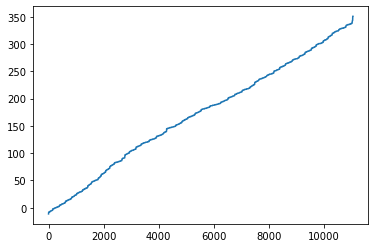

In [121]:
plt.plot(sorted(tdiff/86400))

Now we'll see another very useful function, `.groupby(column)`. It will group all entries by their values in one of the columns. So you can find all samples taken in the same location.

This can be combined with `.count()` to see how many entries have each value. Or you can use `.groups` to get a dictionary of the different groups, which is useful for counting.

**Exercise**: Find out how many of each type of material were sampled (the `sample.sampledMaterialType.label` column).

In [47]:
data.groupby('sample.sampledMaterialType.label').count()

,@id,sample.samplingPoint,sample.samplingPoint.notation,sample.samplingPoint.label,sample.sampleDateTime,determinand.label,determinand.definition,determinand.notation,resultQualifier.notation,result,codedResultInterpretation.interpretation,determinand.unit.label,sample.isComplianceSample,sample.purpose.label,sample.samplingPoint.easting,sample.samplingPoint.northing
sample.sampledMaterialType.label,,,,,,,,,,,,,,,,
ANY LEACHATE,4,4,4,4,4,4,4,4,0,4,0,4,4,4,4,4
ANY SEWAGE,156,156,156,156,156,156,156,156,38,156,0,156,156,156,156,156
ANY SOLID/SEDIMENT - UNSPECIFIED,578,578,578,578,578,578,578,578,163,578,0,578,578,578,578,578
ANY TRADE EFFLUENT,2093,2093,2093,2093,2093,2093,2093,2093,767,2093,0,2093,2093,2093,2093,2093
CALIBRATION WATER,8,8,8,8,8,8,8,8,8,8,0,8,8,8,8,8
CANAL WATER,144,144,144,144,144,144,144,144,8,144,0,144,144,144,144,144
CRUDE SEWAGE,2064,2064,2064,2064,2064,2064,2064,2064,8,2064,0,2064,2064,2064,2064,2064
ESTUARINE WATER,12544,12544,12544,12544,12544,12544,12544,12544,1683,12544,0,12544,12544,12544,12544,12544
ESTUARINE WATER AT HIGH TIDE,189,189,189,189,189,189,189,189,12,189,0,189,189,189,189,189


**Exercise**: Now select both the `sample.samplePoint.easting` and `sample.samplePoint.northing` columns (slice the DataFrame with a list of names). Drop the duplicates. How many different locations are there?

In [122]:
locs = data[['sample.samplingPoint.easting', 'sample.samplingPoint.northing']].drop_duplicates()
len(locs)

1130

**Exercise**: Now convert these to a Numpy array and make a scatter plot to visualise where the samples are.

In [123]:
locs = np.array(locs)

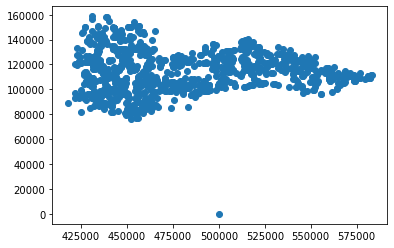

In [124]:
plt.scatter(locs[:,0], locs[:,1])

**Exercise**: There are some outliers in the positions. How many times does this happen? What location(s) does it happen for? Why do you think this happened?

In [69]:
bad_points = data[data['sample.samplingPoint.northing']<10000].groupby('sample.samplingPoint.label')

In [72]:
bad_points.groups

{'DUMP HAMPSHIRE EAST': [6561, 6562, 6563, 6564, 6565, 6566, 6567, 6568, 6569, 6570, 6571, 6572, 6573, 6574, 6575, 6576, 6577, 6578, 6579, 6580, 6581, 6582, 6583, 6584, 6585, 6586, 6587, 6588, 6589, 6590, 6591, 6592, 6593, 6594, 6595, 6596, 6597, 6598, 6599, 6600, 6601, 6602, 6603, 6604, 6605, 6606, 6607, 6608, 6609, 6610, 6611, 6612, 6613, 6614, 6615, 6616, 6617, 6618, 6619, 6620, 6621, 6622, 6623, 6624, 6625, 6626, 6627, 6628, 6629, 6630, 6631, 6632, 6633, 6634, 6635, 6636, 6637, 6638, 6639, 6640, 6641, 6642, 6643, 6644, 6645, 6646, 6647, 6648, 6649, 6650, 6651, 6652, 6653, 6654, 6655, 6656, 6657, 6658, 6659, 6660, ...], 'DUMP ISLE OF WIGHT': [6935, 6936, 6937, 6938, 6939, 6940, 6941, 6942, 6943, 6944], 'DUMP SUSSEX': [6945, 6946, 6947, 6948, 6949, 6950, 6951, 6952, 6953, 6954, 6955, 6956, 6957, 6958, 6959, 6960, 6961, 6962, 6963, 6964, 6965, 6966, 6967, 6968, 6969, 6970, 6971, 6972, 6973, 6974, 6975, 6976, 6977, 6978, 6979, 6980, 6981, 6982, 6983, 6984, 6985, 6986, 6987, 6988, 6989,

**Challenge**: Explore the dataset. How many types of measurements are made? How many are for compliance reasons? How often is a typical location sampled?